In [2]:
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

print(tf.__version__)

2.7.0


In [3]:
datasetfilename = 'afiq_dataset.npz'

with np.load(datasetfilename, allow_pickle=True) as data:
    
    dataImages = data['images']
    dataLabel = data['labels']
    dataLabelNames = data['labelnames']
    
print(dataImages.shape)
print(dataLabel.shape)
print(dataLabelNames.shape)

(15,)
(15,)
(15,)


In [4]:
dataImages.dtype, dataLabel.dtype, dataLabelNames.dtype

(dtype('O'), dtype('int32'), dtype('<U10'))

In [5]:
print(dataLabel)
print(dataLabelNames)

[0 1 2 3 4 5 6 7 8 0 1 3 4 6 7]
['afiq' 'azureen' 'gavin' 'goke' 'inamul' 'jincheng' 'mahmuda' 'numan'
 'saseendran' 'afiq' 'azureen' 'goke' 'inamul' 'mahmuda' 'numan']


In [7]:
classNames = sorted(np.unique(dataLabelNames))
print(classNames)

['afiq', 'azureen', 'gavin', 'goke', 'inamul', 'jincheng', 'mahmuda', 'numan', 'saseendran']


In [8]:
import cv2 as cv

N = len(dataImages)
shape = (N,200,200,3)

y = np.empty(shape, dtype='uint8')

for i in range(N):
    y[i] = cv.resize(dataImages[i], [200,200], interpolation=cv.INTER_NEAREST)
    
    
dataImages.dtype, y.dtype, y.shape

dataImages = y

In [9]:
dataLabel = dataLabel.astype('uint8')
dataLabel.dtype

dtype('uint8')

15
(200, 200)


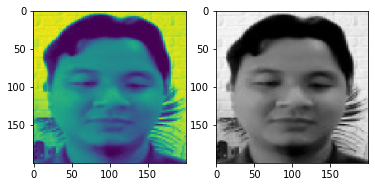

In [12]:
grayImg = []

for i in range (N):
    true_gray = cv.cvtColor(dataImages[i],cv.COLOR_BGR2GRAY)
    #true_gray = cv.cvtColor(gray,cv.COLOR_GRAY2RGB)
    grayImg.append(true_gray)
   


print(len(grayImg))
print(grayImg[0].shape)
plt.subplot(1,2,1)
plt.imshow(grayImg[0])
plt.subplot(1,2,2)
plt.imshow(cv.cvtColor(grayImg[0],cv.COLOR_GRAY2RGB))
plt.tight_layout
plt.show()



In [13]:
grayImg =np.array(grayImg)
print(grayImg.shape)
dataImages = grayImg.copy()

(15, 200, 200)


In [15]:
# Split the data to train and test
trainImages, testImages, trainLabels, testLabels = train_test_split(dataImages, dataLabel, test_size=0.33, random_state=42)

print(dataImages.shape)
print(dataLabel)

print(trainImages.shape)
print(testImages.shape)
print(testLabels)

(15, 200, 200)
[0 1 2 3 4 5 6 7 8 0 1 3 4 6 7]
(10, 200, 200)
(5, 200, 200)
[0 3 0 6 5]


In [166]:
# classNames = sorted(np.unique(dataLabelNames))
# dataLabel[0]

In [167]:
# plt.figure()

# i = 0
# plt.imshow(trainImages[i])
# plt.title(f'{trainLabels[i]}')
# # plt.xlabel(classNames[dataLabel[i]])
# plt.show()

In [16]:
import numpy as np

print(trainImages[0].shape)
print(trainImages[1].shape)

(200, 200)
(200, 200)


In [17]:
for i in range(len(trainImages)):
    trainImages[i] = cv.resize(trainImages[i], [200,200], interpolation=cv.INTER_NEAREST)



In [18]:
inputShape = trainImages[0].shape
outputShape = len(classNames)

inputShape, outputShape

((200, 200), 9)

In [19]:
trainImages = trainImages / 255
testImages = testImages / 255

In [20]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=inputShape),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(outputShape)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 40000)             0         
                                                                 
 dense (Dense)               (None, 128)               5120128   
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 128)               16512     
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 9)                 1

In [21]:
model.compile(optimizer='adam', loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [22]:
model.fit(trainImages, trainLabels, epochs=10)

Epoch 1/10
1/1 [==============================] - 2s 2s/step - loss: 2.3207 - accuracy: 0.1000
Epoch 2/10
1/1 [==============================] - 0s 28ms/step - loss: 4.3458 - accuracy: 0.2000
Epoch 3/10
1/1 [==============================] - 0s 26ms/step - loss: 5.5177 - accuracy: 0.1000
Epoch 4/10
1/1 [==============================] - 0s 29ms/step - loss: 4.9940 - accuracy: 0.3000
Epoch 5/10
1/1 [==============================] - 0s 33ms/step - loss: 4.5204 - accuracy: 0.2000
Epoch 6/10
1/1 [==============================] - 0s 34ms/step - loss: 2.9874 - accuracy: 0.3000
Epoch 7/10
1/1 [==============================] - 0s 28ms/step - loss: 2.2148 - accuracy: 0.5000
Epoch 8/10
1/1 [==============================] - 0s 30ms/step - loss: 1.8173 - accuracy: 0.5000
Epoch 9/10
1/1 [==============================] - 0s 33ms/step - loss: 1.6036 - accuracy: 0.4000
Epoch 10/10
1/1 [==============================] - 0s 31ms/step - loss: 1.3272 - accuracy: 0.4000


In [24]:
testLoss, testAcc = model.evaluate(testImages, testLabels, verbose=2)

print('\nTest accuracy:', testAcc)

1/1 - 0s - loss: 5.4134 - accuracy: 0.2000 - 167ms/epoch - 167ms/step

Test accuracy: 0.20000000298023224


In [25]:
predictions = model.predict(testImages)
predictions[0]

array([-3.1283743 ,  3.5083027 ,  3.418655  ,  5.067615  ,  0.9088425 ,
       -0.09809516,  4.32305   ,  5.0484743 ,  1.916928  ], dtype=float32)

In [26]:
i = 1
predictedLabel = np.argmax(predictions[i])
predictedLabel, testLabels[i], predictedLabel == testLabels[i]



(3, 3, True)

(200, 200)


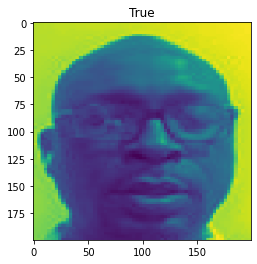

In [184]:
print(testImages[i].shape)

plt.imshow(testImages[i])
plt.title(predictedLabel == testLabels[i])
plt.show()

### Using softmax

- softmax layer assist in turning the prediction values to fraction.
- showing the highest value as the most likely

In [179]:
probabilityModel = tf.keras.Sequential([model,tf.keras.layers.Softmax()])

predictions =probabilityModel.predict(testImages)
predictions[2]

array([3.2826552e-05, 7.5816386e-03, 1.6902618e-03, 4.1117258e-03,
       9.7682960e-07, 1.0977737e-07, 8.8022932e-02, 8.9786345e-01,
       6.9611653e-04], dtype=float32)

In [180]:
np.argmax(predictions[2]),testLabels[2]

(7, 0)

# saving model

In [181]:
import os

exportPath = ""
modelDir = 'tf_model'
version = f"4_{(testAcc*100):.0f}"

exportPath = os.path.join(modelDir,version)

model.save(exportPath,save_format="tf")

print('\nexport path = {}'.format(exportPath))

!dir{exportPath}

INFO:tensorflow:Assets written to: tf_model\4_20\assets

export path = tf_model\4_20


The system cannot find the path specified.


### simulation for best models

In [182]:
maxIterations = 10
testAccList = []
threshholdAcc = 0.97
lastTestAcc = 0.0

model = None
testLoss = 0.0 
testAcc = 0.0
modelDir = 'tf_model'
epoch = 10

for iter in range (maxIterations):

    print(f'\nsimulation {iter+1}/{maxIterations}',end='...')

    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=inputShape),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(outputShape)
    ])

    model.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(
                    from_logits=True),
                metrics= ['accuracy'])

    model.fit(trainImages,trainLabels,epochs=epoch,verbose=0)

    testLoss,testAcc= model.evaluate(testImages,testLabels,verbose=0)

    testAccList.append(testAcc)

    print(f'test accuracy {testAcc}',end='...')

    exportPath =""

    if testAcc > threshholdAcc:
        version = f"4_{(testAcc*100):.0f}"

        exportPath = os.path.join(modelDir,version)

        model.save(exportPath,save_format="tf")

        #print(f'\nexport path = {exportPath}')

        print(f'export path = {exportPath}',end='')

        # exportPath = os.path.join(modelDir,f'{version}.h5')

        # model.save(exportPath)
        # print("saves: ",exportPath)

        threshholdAcc =testAcc

print('.')


simulation 1/10...test accuracy 0.0...
simulation 2/10...test accuracy 0.0...
simulation 3/10...test accuracy 0.20000000298023224...
simulation 4/10...test accuracy 0.0...
simulation 5/10...test accuracy 0.0...
simulation 6/10...test accuracy 0.20000000298023224...
simulation 7/10...test accuracy 0.0...
simulation 8/10...test accuracy 0.0...
simulation 9/10...test accuracy 0.0...
simulation 10/10...test accuracy 0.0....
